In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

Step 2: Load and Inspect the Data


In [3]:
# Load the dataset
data = pd.read_csv("synthetic_steel_tensile_strength_data.csv")

# Show basic statistics and check for missing values
print(data.describe())
print(data.isnull().sum())

        Carbon (%)  Manganese (%)  Silicon (%)  Phosphorus (%)   Sulfur (%)  \
count  1000.000000    1000.000000  1000.000000     1000.000000  1000.000000   
mean      0.541231       1.161929     0.225842        0.029615     0.029764   
std       0.262924       0.496723     0.101736        0.011460     0.011472   
min       0.104169       0.305471     0.050004        0.010026     0.010001   
25%       0.312376       0.709826     0.141473        0.019676     0.019799   
50%       0.547127       1.181848     0.225215        0.029371     0.029784   
75%       0.769888       1.592791     0.315686        0.039502     0.039600   
max       0.999746       1.999003     0.399237        0.049982     0.049910   

       Chromium (%)   Nickel (%)  Molybdenum (%)  Vanadium (%)  \
count   1000.000000  1000.000000     1000.000000   1000.000000   
mean       0.797850     0.543978        0.267067      0.122975   
std        0.404873     0.260760        0.128211      0.042335   
min        0.108657     

Step 3: Data Preprocessing

In [4]:
# Separate features and target variable
X = data.drop('Tensile Strength (MPa)', axis=1)
y = data['Tensile Strength (MPa)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 4: Exploratory Data Analysis (EDA)

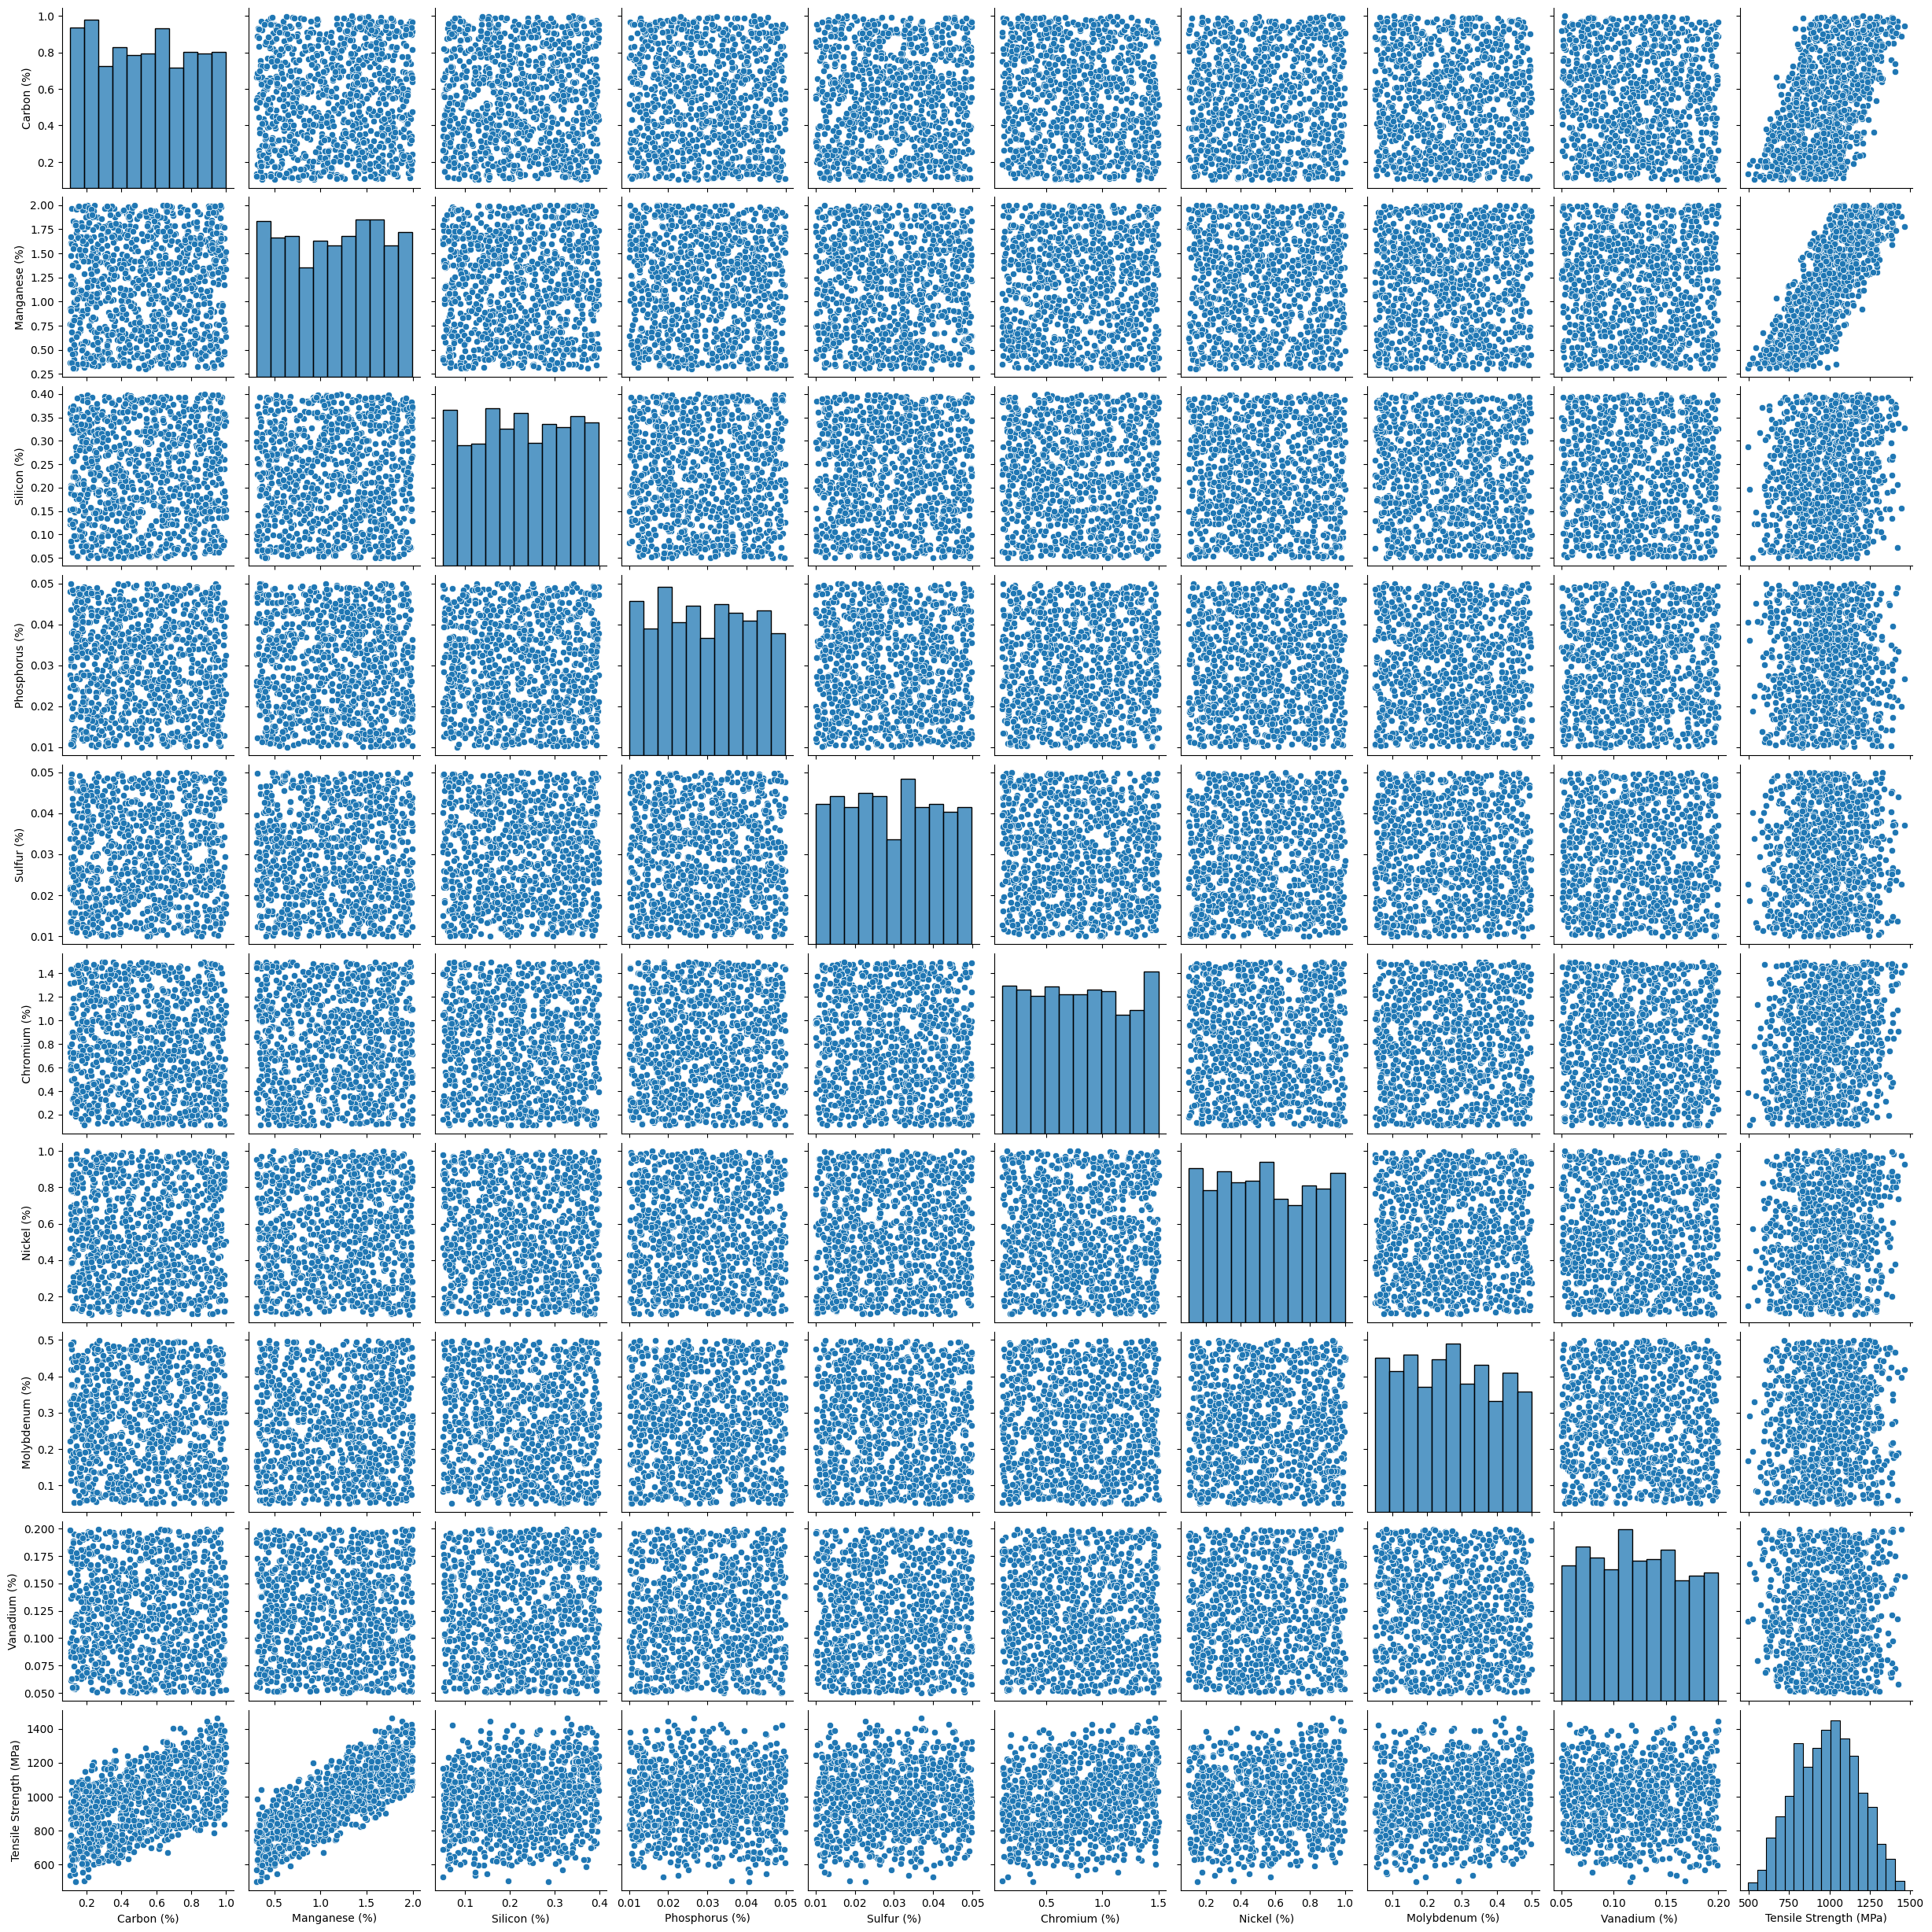

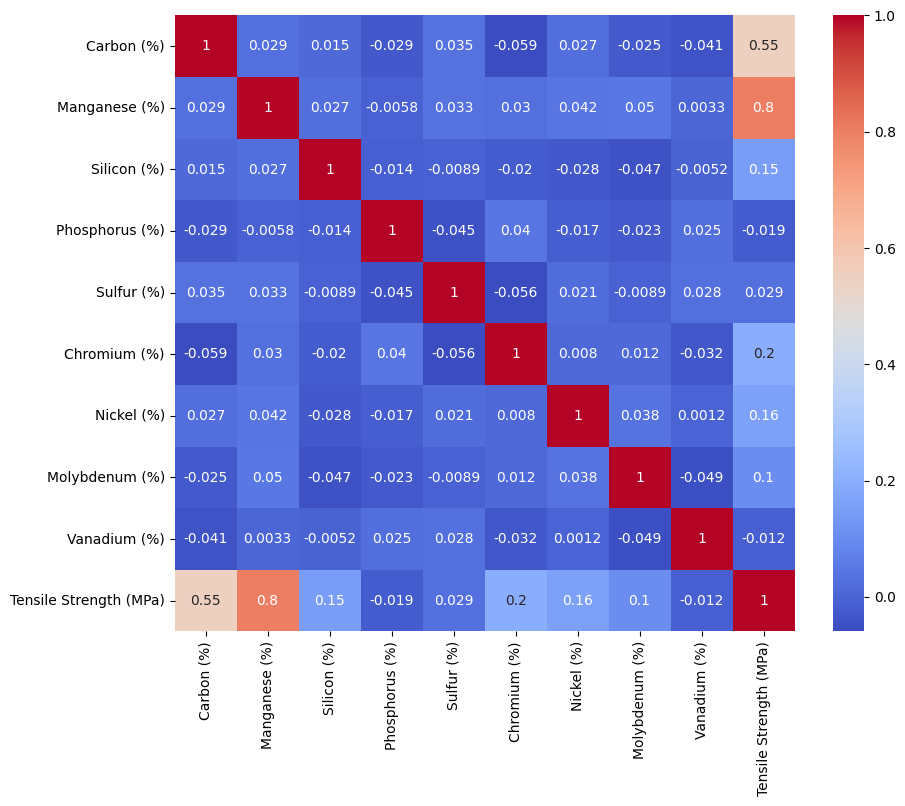

In [5]:
# Pairplot to see relationships between features and tensile strength
sns.pairplot(data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

Step 5: Model Selection

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

Step 6: Model Training and Evaluation

In [7]:
# Dictionary to store model performance
model_performance = {}

# Train and evaluate Linear Regression
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
model_performance['Linear Regression'] = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": mean_squared_error(y_test, y_pred, squared=False)
}

# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
model_performance['Random Forest'] = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": mean_squared_error(y_test, y_pred, squared=False)
}

# Train and evaluate Gradient Boosting
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
model_performance['Gradient Boosting'] = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "RMSE": mean_squared_error(y_test, y_pred, squared=False)
}

# Display model performance
print(pd.DataFrame(model_performance))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


      Linear Regression  Random Forest  Gradient Boosting
MAE            8.273744      31.930314          20.119102
RMSE          10.485878      39.052634          25.348111


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Step 7: Model Optimization

In [8]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}


Step 8: Feature Importance Analysis

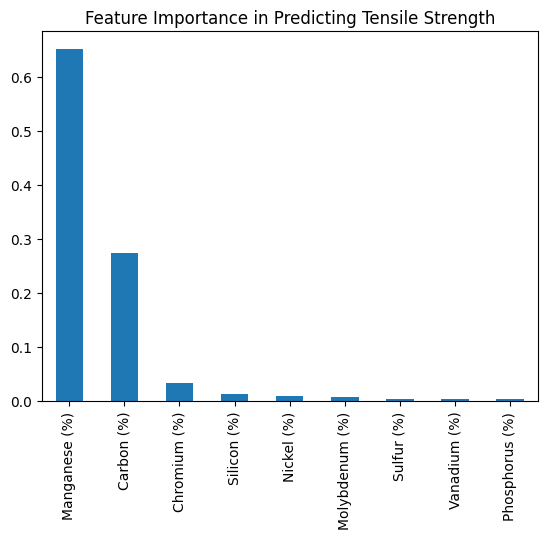

In [9]:
# Display feature importance for Random Forest
best_rf_model = grid_search.best_estimator_
importances = best_rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance in Predicting Tensile Strength")
plt.show()

Step 9: Deployment (Save the Model)

In [11]:
# Import necessary library for calculating metrics
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate accuracy as (100 - MAPE * 100)
accuracy_percentage = 100 - (mape * 100)
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Model Accuracy: 96.45%


In [12]:
import joblib

# Save the best model
joblib.dump(best_rf_model, 'tensile_strength_predictor.pkl')

# To load the model for future predictions:
# loaded_model = joblib.load('tensile_strength_predictor.pkl')

['tensile_strength_predictor.pkl']